<a href="https://colab.research.google.com/github/Nelsonaos/Oviedo_Nelso_PPreentrega/blob/main/PrimerPreEntrega_Oviedo_Neso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Science CoderHouse [61750]

\# Oviedo Nelso primer pre entrega


## Fuente
Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace:
https://www.kaggle.com/datasets/purumalgi/music-genre-classification/data?select=train.csv


## Importacion librerias

In [47]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importacion Base de datos

In [48]:
url= 'https://raw.githubusercontent.com/Nelsonaos/Oviedo_Nelso_PPreentrega/refs/heads/main/train.csv'
df = pd.read_csv(url)

df.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


## Exploracion datos

In [4]:
df.shape

(17996, 17)

In [49]:
df.columns

Index(['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Class'],
      dtype='object')

In [50]:
df.info()
df.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

array([['Bruno Mars', "That's What I Like (feat. Gucci Mane)", 60.0, ...,
        234596.0, 4, 5],
       ['Boston', 'Hitch a Ride', 54.0, ..., 251733.0, 4, 10],
       ['The Raincoats', 'No Side to Fall In', 35.0, ..., 109667.0, 4, 6],
       ...,
       ['Smash Hit Combo', 'Peine perdue', 34.0, ..., 216222.0, 4, 8],
       ['Beherit', "Salomon's Gate", 29.0, ..., 219693.0, 4, 8],
       ['The Raconteurs', 'Broken Boy Soldier', 43.0, ..., 182227.0, 4,
        10]], dtype=object)

In [51]:
df.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,17568.000000,17996.000000,17996.000000,15982.000000,17996.000000,17996.000000,17996.000000,17996.000000,13619.000000,17996.000000,17996.000000,17996.000000,1.799600e+04,17996.000000,17996.000000
mean,44.512124,0.543433,0.662777,5.952447,-7.910660,0.636753,0.079707,0.247082,0.177562,0.196170,0.486208,122.623294,2.007445e+05,3.924039,6.695821
std,17.426928,0.166268,0.235373,3.196854,4.049151,0.480949,0.083576,0.310632,0.304048,0.159212,0.240195,29.571527,1.119891e+05,0.361618,3.206073
min,1.000000,0.059600,0.000020,1.000000,-39.952000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,33.000000,0.432000,0.509000,3.000000,-9.538000,0.000000,0.034800,0.004300,0.000089,0.097500,0.297000,99.620750,1.663370e+05,4.000000,5.000000
50%,44.000000,0.545000,0.700000,6.000000,-7.016000,1.000000,0.047400,0.081400,0.003910,0.129000,0.481000,120.065500,2.091600e+05,4.000000,8.000000
75%,56.000000,0.659000,0.860000,9.000000,-5.189000,1.000000,0.083000,0.434000,0.200000,0.258000,0.672000,141.969250,2.524900e+05,4.000000,10.000000
max,100.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.955000,0.996000,0.996000,1.000000,0.986000,217.416000,1.477187e+06,5.000000,10.000000


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,17568.0,44.512124,17.426928,1.000000,33.000000,44.00000,56.00000,100.000
danceability,17996.0,0.543433,0.166268,0.059600,0.432000,0.54500,0.65900,0.989
energy,17996.0,0.662777,0.235373,0.000020,0.509000,0.70000,0.86000,1.000
key,15982.0,5.952447,3.196854,1.000000,3.000000,6.00000,9.00000,11.000
loudness,17996.0,-7.910660,4.049151,-39.952000,-9.538000,-7.01600,-5.18900,1.355
mode,17996.0,0.636753,0.480949,0.000000,0.000000,1.00000,1.00000,1.000
speechiness,17996.0,0.079707,0.083576,0.022500,0.034800,0.04740,0.08300,0.955
acousticness,17996.0,0.247082,0.310632,0.000000,0.004300,0.08140,0.43400,0.996
instrumentalness,13619.0,0.177562,0.304048,0.000001,0.000089,0.00391,0.20000,0.996
liveness,17996.0,0.196170,0.159212,0.011900,0.097500,0.12900,0.25800,1.000


In [12]:

print(df.columns.tolist())

['Artist Name', 'Track Name', 'Popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_in min/ms', 'time_signature', 'Class']


In [53]:
df.tail()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.99300,0.824000,0.0984,0.177,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.85800,0.000016,0.0705,0.335,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.00003,0.000136,0.6660,0.262,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.00129,0.916000,0.2560,0.355,131.363,219693.0,4,8
17995,The Raconteurs,Broken Boy Soldier,43.0,0.400,0.853,4.0,-5.320,0,0.0591,0.00604,0.212000,0.3340,0.377,138.102,182227.0,4,10


In [54]:
print(df.iloc[:,:])

                 Artist Name                             Track Name  \
0                 Bruno Mars  That's What I Like (feat. Gucci Mane)   
1                     Boston                           Hitch a Ride   
2              The Raincoats                     No Side to Fall In   
3                       Deno             Lingo (feat. J.I & Chunkz)   
4      Red Hot Chili Peppers      Nobody Weird Like Me - Remastered   
...                      ...                                    ...   
17991            Green-House                              Find Home   
17992               Micatone                               All Gone   
17993        Smash Hit Combo                           Peine perdue   
17994                Beherit                         Salomon's Gate   
17995         The Raconteurs                     Broken Boy Soldier   

       Popularity  danceability  energy   key  loudness  mode  speechiness  \
0            60.0         0.854   0.564   1.0    -4.964     1       0

In [55]:
df.isnull().sum()

,0
Artist Name,0
Track Name,0
Popularity,428
danceability,0
energy,0
key,2014
loudness,0
mode,0
speechiness,0
acousticness,0


In [16]:
Nulos = df.isnull().sum()
ColumnaNulos = Nulos[Nulos > 0]
print("Columnas con valores nulos")
print(ColumnaNulos)

Columnas con valores nulos
Popularity           428
key                 2014
instrumentalness    4377
dtype: int64


In [17]:
PorcentajeN = (ColumnaNulos / len(df)) * 100
print("Porcentaje de valores nulos por columna")
print(PorcentajeN)
#Esto se realiza con el fin de ver el porcentaje y calcular que es lo mas conveniente#

Porcentaje de valores nulos por columna
Popularity           2.378306
key                 11.191376
instrumentalness    24.322072
dtype: float64


In [18]:
print(df['Popularity'])
df['Popularity'].value_counts()

0        60.0
1        54.0
2        35.0
3        66.0
4        53.0
         ... 
17991    35.0
17992    27.0
17993    34.0
17994    29.0
17995    43.0
Name: Popularity, Length: 17996, dtype: float64


,count
Popularity,
42.0,460
41.0,442
43.0,433
34.0,431
37.0,420
...,...
93.0,4
96.0,3
100.0,2


In [19]:
df.duplicated().sum()

0

###En este punto se hace una copia de l base para poder experimentar sin romper accidentalmente el dataset, por lo cual ya con en analisis previo, pasamos a realizar copia y reemplazar valores

In [5]:
df_1 = df.copy()

###Reemplazo de valores nulos

In [21]:
df_1['Popularity'].fillna(df_1['Popularity'].median(), inplace=True)
df_1['key'].fillna(df_1['key'].mode()[0], inplace=True)
df_1['instrumentalness'].fillna(df_1['instrumentalness'].median(), inplace=True)

<ipython-input-21-1fb3e87c262d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['Popularity'].fillna(df_1['Popularity'].median(), inplace=True)
<ipython-input-21-1fb3e87c262d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [22]:
print(df_1.isnull().sum())

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64


## Graficacion

In [23]:
print(df_1['Class'].value_counts())
print(df_1['energy'].value_counts())
print(df_1['danceability'].value_counts())

Class
10    4949
6     2587
9     2524
8     1854
5     1447
1     1373
2     1272
0      625
7      576
3      402
4      387
Name: count, dtype: int64
energy
0.8720    55
0.9320    55
0.9480    54
0.9310    51
0.9140    50
          ..
0.0669     1
0.0842     1
0.0123     1
0.0371     1
0.0835     1
Name: count, Length: 1208, dtype: int64
danceability
0.5270    63
0.5290    62
0.5330    59
0.5520    59
0.6010    56
          ..
0.9740     1
0.0726     1
0.1460     1
0.0998     1
0.9480     1
Name: count, Length: 909, dtype: int64


###Grafico Dispersion

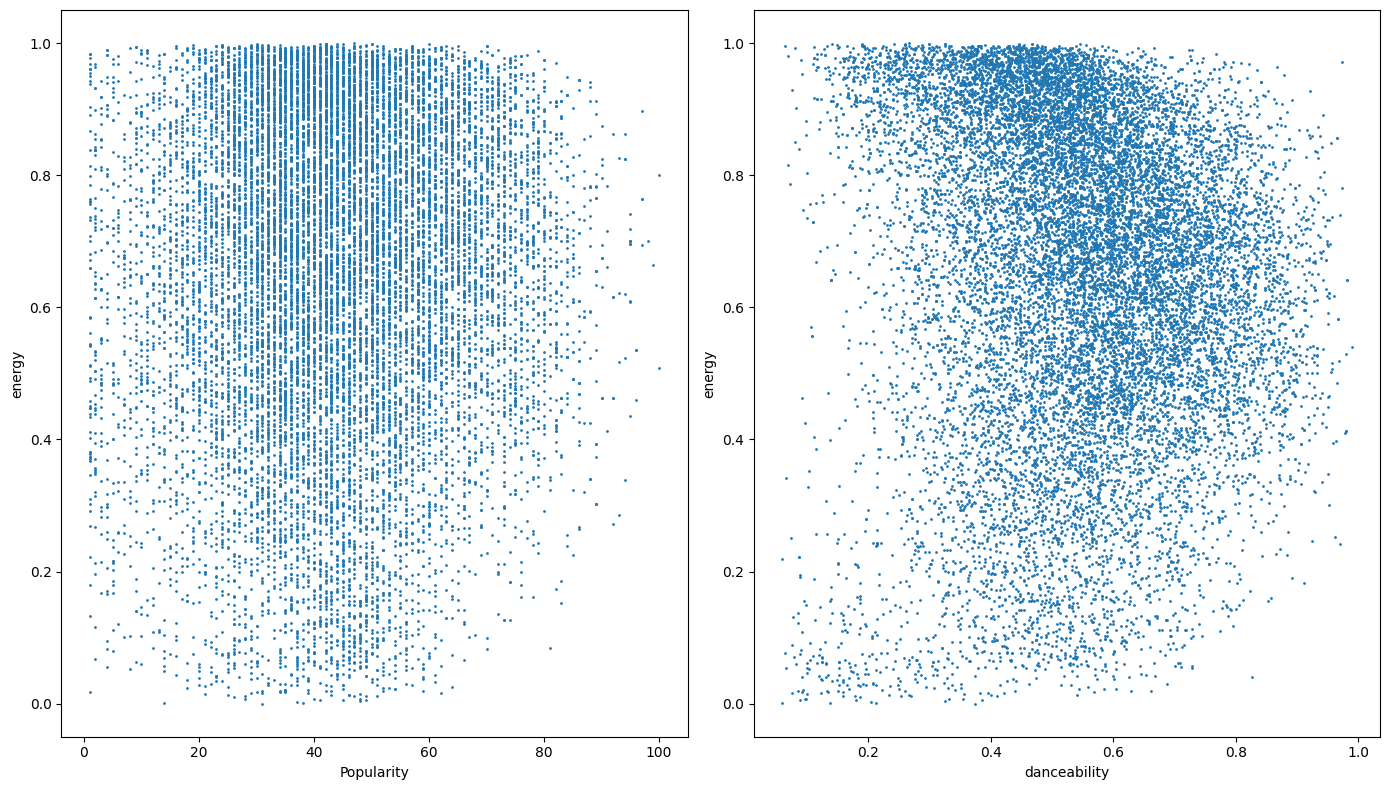

In [57]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

ax1.scatter(df_1['Popularity'], df_1['energy'], s = 1)
ax2.scatter(df_1['danceability'], df_1['energy'], s = 1)
ax1.set_xlabel('Popularity')
ax1.set_ylabel('energy')
ax2.set_xlabel('danceability')
ax2.set_ylabel('energy')
plt.tight_layout()

In [59]:
# Selecion de solo xolumnas numericas tipo float, esto con el fin de poder graficar#
df_float = df_1.select_dtypes(include=['float64'])
df_float

,Popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms
0,60.0,0.854,0.564,1.0,-4.964,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0
1,54.0,0.382,0.814,3.0,-7.230,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0
2,35.0,0.434,0.614,6.0,-8.334,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0
3,66.0,0.853,0.597,10.0,-6.528,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0
4,53.0,0.167,0.975,2.0,-4.279,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17991,35.0,0.166,0.109,7.0,-17.100,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0
17992,27.0,0.638,0.223,11.0,-10.174,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0
17993,34.0,0.558,0.981,4.0,-4.683,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0
17994,29.0,0.215,0.805,6.0,-12.757,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0


Grafico Dispersion

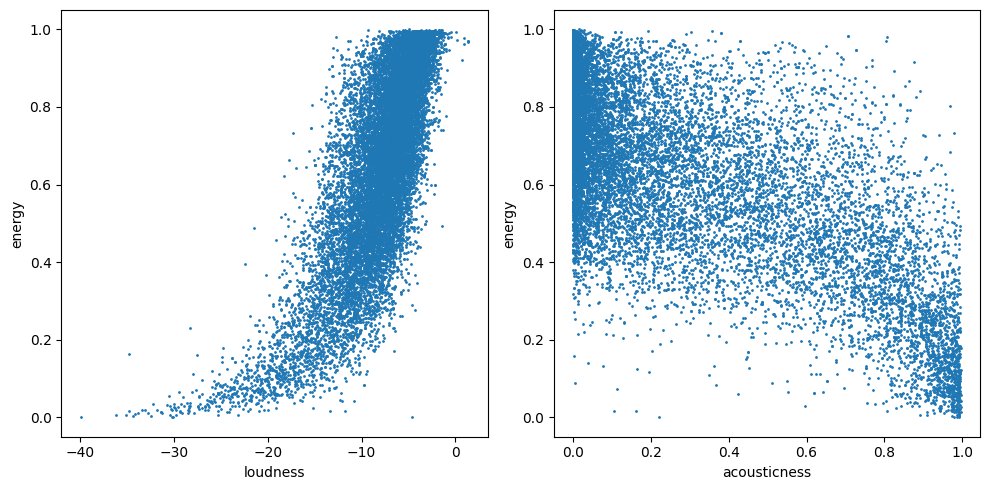

In [60]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.scatter(df_float['loudness'], df_float['energy'], s = 1)
ax2.scatter(df_float['acousticness'], df_float['energy'], s = 1)
ax1.set_xlabel('loudness')
ax1.set_ylabel('energy')
ax2.set_xlabel('acousticness')
ax2.set_ylabel('energy')

plt.tight_layout()

 Podemos notar un patron de relacion entre loundness y energia en el primer grafico de manera ascendente. Por otra parte en cuanto a acousticness y energy tiende a descender pero con muchos outlider

Grafico Dispersion

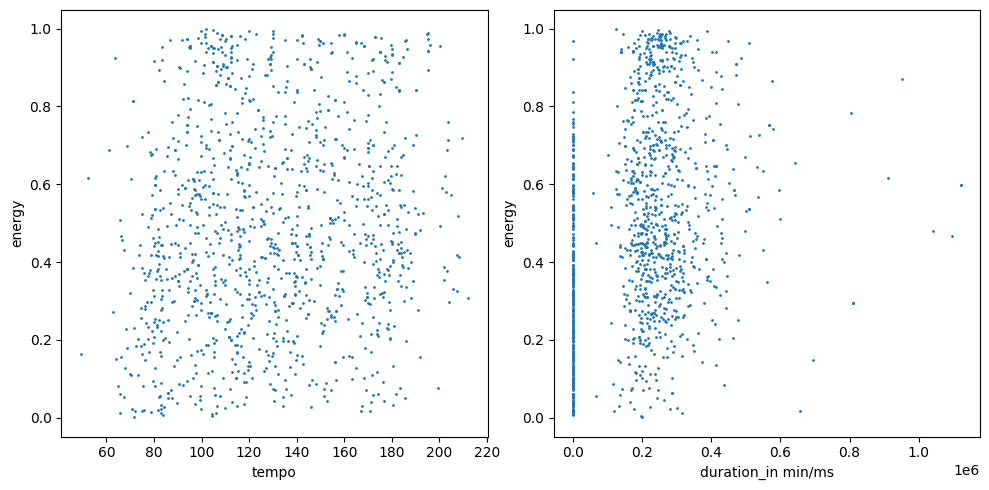

In [35]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

ax1.scatter(df_float['tempo'], df_float['energy'], s = 1)
ax2.scatter(df_float['duration_in min/ms'], df_float['energy'], s = 1)
ax1.set_xlabel('tempo')
ax1.set_ylabel('energy')
ax2.set_xlabel('duration_in min/ms')
ax2.set_ylabel('energy')

plt.tight_layout()

Ee cuando a la relacion energia y durecion , notamos que hay una tendencia en la durecion de entre 0.2 a 0.4, y 0.6 en menor medida

In [18]:
df_1[['energy', 'Popularity', 'danceability','duration_in min/ms','tempo','acousticness','Class']].corr()

,energy,Popularity,danceability,duration_in min/ms,tempo,acousticness,Class
energy,1.000000,0.051538,-0.093838,0.245768,0.210224,-0.745963,0.217328
Popularity,0.051538,1.000000,0.167213,-0.031118,-0.006050,-0.125410,0.161072
danceability,-0.093838,0.167213,1.000000,-0.121624,-0.183527,0.009055,-0.097681
duration_in min/ms,0.245768,-0.031118,-0.121624,1.000000,0.045133,-0.322583,0.203678
tempo,0.210224,-0.006050,-0.183527,0.045133,1.000000,-0.168318,0.031737
acousticness,-0.745963,-0.125410,0.009055,-0.322583,-0.168318,1.000000,-0.237138
Class,0.217328,0.161072,-0.097681,0.203678,0.031737,-0.237138,1.000000


<Axes: >

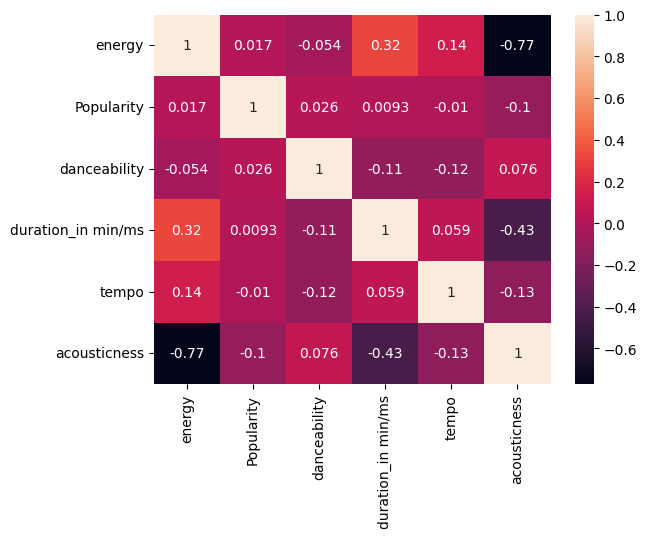

In [41]:
sns.heatmap(df_1[['energy', 'Popularity', 'danceability','duration_in min/ms','tempo','acousticness']].corr(), annot=True)

### Buscamos relacion entre nuestras variables selecionadas
Podemos notar que los canciones Acusticas tienden a ser menos energicas ,
Tambien la relacion entre la durecion y la energia
con respecto a la popularidad asi como el tempo son variables que no tiene relacion significativa

<Axes: >

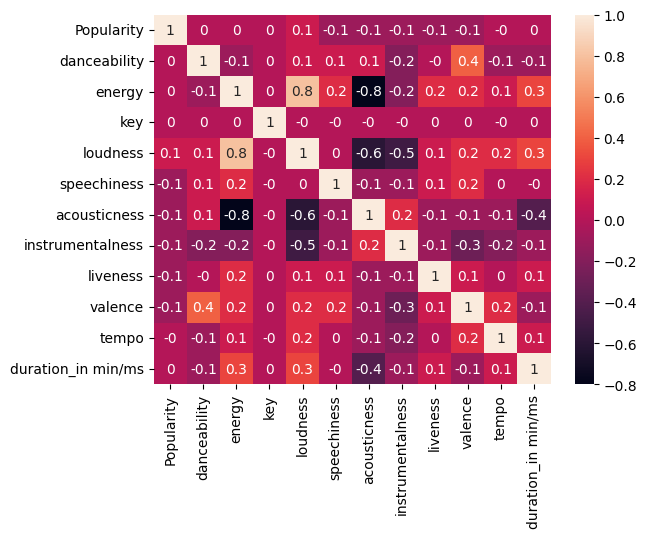

In [44]:
sns.heatmap(df_float.corr().round(1), annot=True)

###Grafico Popularidad por clase

<ipython-input-39-bec759251709>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_1, x='Class', y='Popularity', palette='muted')


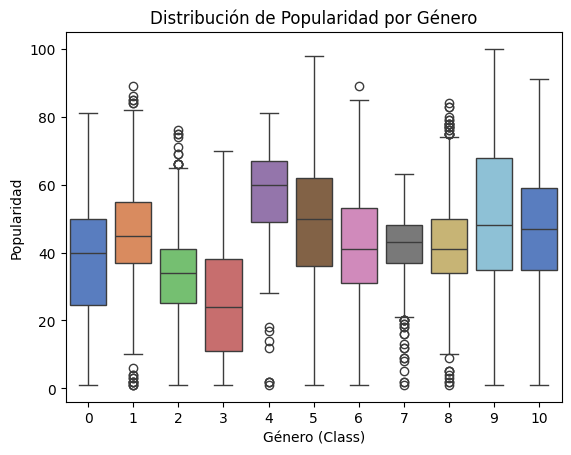

Porcentaje de Popularidad por Género:
Class
0      2.68
1      7.89
2      5.29
3      1.30
4      2.69
5      8.86
6     13.49
7      2.90
8      9.84
9     15.85
10    29.20
Name: Popularity, dtype: float64


In [39]:
sns.boxplot(data=df_1, x='Class', y='Popularity', palette='muted')
plt.title("Distribución de Popularidad por Género")
plt.xlabel("Género (Class)")
plt.ylabel("Popularidad")
plt.show()


total_popularity = df_1['Popularity'].sum()
Porcentaje = (df_1.groupby('Class')['Popularity'].sum() / total_popularity) * 100
print("Porcentaje de Popularidad por Género:")
print(Porcentaje.round(2))


Grafico de Energia por clase

<ipython-input-40-717ec5f84a2a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_1, x='Class', y='energy', palette='muted')


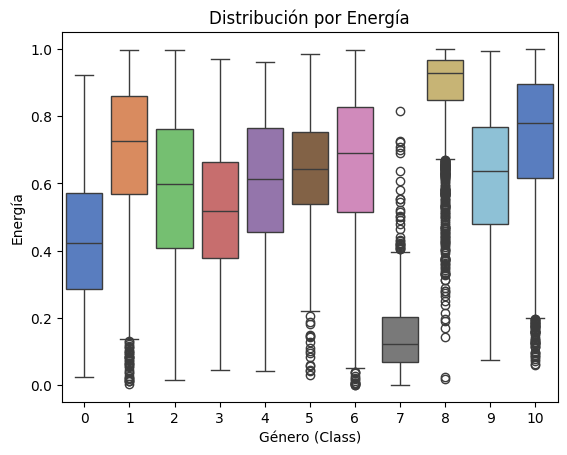

Porcentaje de Energía por Género:
Class
0      2.28
1      7.92
2      6.16
3      1.76
4      1.95
5      7.80
6     14.18
7      0.75
8     13.61
9     13.10
10    30.49
Name: energy, dtype: float64


In [40]:
sns.boxplot(data=df_1, x='Class', y='energy', palette='muted')
plt.title("Distribución por Energía")
plt.xlabel("Género (Class)")
plt.ylabel("Energía")
plt.show()

total_energy = df_1['energy'].sum()
Porcentaje2 = (df_1.groupby('Class')['energy'].sum() / total_energy) * 100
Porcentaje2 = Porcentaje2.round(2)

print("Porcentaje de Energía por Género:")
print(Porcentaje2)
